In [24]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize_scalar
from matplotlib import pyplot as plt

In [25]:
A = pd.read_csv('A.csv', header=None)

In [26]:
A.shape

(10, 20)

In [27]:
Psi = pd.read_csv('Psi.csv')

In [28]:
A.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,72.0,85.0,9.0,2.0,4.4,6,0,0,0,1,5,0,0,0,0,7,1,3,3,4
1,640.0,69.0,25.0,52.0,17.0,8,4,6,2,3,6,7,7,0,6,4,7,6,3,8
2,42.0,5.6,3.4,2.5,5.0,5,9,5,5,6,7,2,6,8,7,5,5,4,6,0
3,371.0,34.0,3.6,0.4,20.0,3,3,8,7,8,2,6,4,7,5,0,4,5,8,9
4,250.0,8.0,1.0,3.2,6.5,0,8,3,8,4,3,5,5,3,0,3,3,2,4,0
5,545.0,100.0,5.0,33.0,56.5,7,6,9,1,5,0,9,9,4,4,9,8,8,5,6
6,360.7,35.6,7.7,19.1,39.5,0,7,7,0,9,8,4,8,9,9,8,2,0,9,5
7,57.0,5.9,3.0,3.2,4.0,4,5,2,6,2,9,3,3,6,3,0,9,9,2,0
8,334.0,4.0,12.0,2.0,67.0,9,2,4,9,7,4,8,2,5,8,6,6,7,7,7
9,365.0,16.0,12.0,1.3,59.0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
Psi.head()

,Unnamed: 0,Стрижов,Гребенькова,Михеев,Тихонов,Панченко,Панкратов,Харь,Савельев,Исламов,Волынцев,Христолюбов,Алсаханова,Северилов,Колесов,Бишук
0,"Калорийность, кКал",6,9,3,8,7,10,10,3,1,10,10,7,8,10,10
1,"Цена 100г, руб.",7,9,6,3,8,10,10,8,10,10,4,8,10,10,10
2,Белки,0,8,9,5,7,9,7,9,9,10,10,6,10,8,10
3,Жиры,9,9,7,7,5,9,9,7,2,10,1,9,10,10,10
4,Углеводы,5,9,7,7,6,6,9,5,3,10,8,6,8,10,10


In [30]:
A = np.array(A.values, dtype=float)

In [31]:
P = np.array(Psi.values[:, 1:], dtype = float)
P.T.shape

(15, 20)

In [32]:
w0 = P.T

In [33]:
q0 = A[:, 5:].T

In [34]:
q1 = (A@(w0.T)).T

In [35]:
A_pinv = np.linalg.pinv(A)

In [36]:
w1 = (A_pinv@(q0.T)).T

In [37]:
n = q0.shape[1]
m = w0.shape[1]

In [38]:
def find_alpha(q0, q1, w0, w1):
    def f(a):
        q = a*q0 + (1-a)*q1
        w = (1-a)*w0 + a*w1
        return np.linalg.norm(q-q0,np.inf)**2/n + np.linalg.norm(w-w0, np.inf)**2/m
    return minimize_scalar(f, bounds=(0, 1), method='Bounded').x

In [39]:
rangs = []
for k in range(q0.shape[0]):
    a = find_alpha(q0[k], q1[k], w0[k], w1[k])
    q = a*q0[k] + (1-a)*q1[k]
    w = (1-a)*w0[k] + a*w1[k]
    rangs.append(np.linalg.norm(q-q0[k],np.inf)**2/n + np.linalg.norm(w-w0[k], np.inf)**2/m)

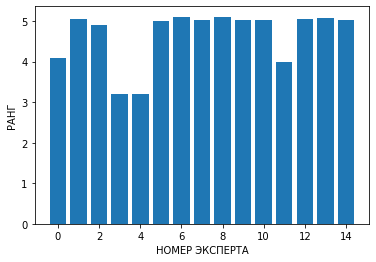

In [40]:
plt.bar(list(range(len(rangs))), rangs)
plt.xlabel('НОМЕР ЭКСПЕРТА')
plt.ylabel('РАНГ')
plt.show()

In [41]:
print('Номер лучшего эксперта =', rangs.index(max(rangs)))

Номер лучшего эксперта = 6


In [42]:
q0[6]

array([0., 7., 2., 6., 5., 9., 4., 3., 8., 0.])

In [43]:
for i, c in enumerate(q0[6]):
    print(i,c)

0 0.0
1 7.0
2 2.0
3 6.0
4 5.0
5 9.0
6 4.0
7 3.0
8 8.0
9 0.0


In [44]:
rating = np.zeros(9)

In [45]:
rating[5] = 1
rating[8] = 2
rating[1] = 3
rating[3] = 4
rating[4] = 5
rating[6] = 6
rating[7] = 7
rating[2] = 8
rating[0] = 9

In [46]:
my_rating = rating
svyato_rating = np.array([9,5,4,6,7,3,1,8,2])
anton_rating = np.array([9,6,7,4,8,1,2,3,5])
viktor_rating = np.array([8,9,5,6,7,1,2,4,3])
olya_rating = np.array([8,3,4,6,5,1,2,7,9])

In [47]:
import matplotlib.pyplot as plt

In [48]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

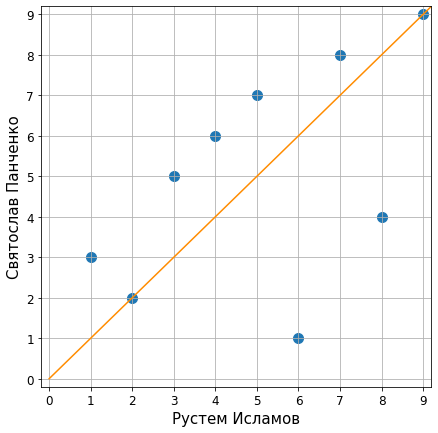

In [183]:
plt.figure(figsize=[7,7])
plt.xlim([-0.2,9.2])
plt.ylim([-0.2,9.2])
plt.scatter(my_rating, svyato_rating,s=100)
plt.plot([0,10],[0,10], color='darkorange')
plt.xlabel(r'Рустем Исламов', fontsize=15)
plt.ylabel(r'Святослав Панченко', fontsize=15)
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.yticks([0,1,2,3,4,5,6,7,8,9])
plt.grid()
plt.savefig('rustem_vs_svyato.pdf')

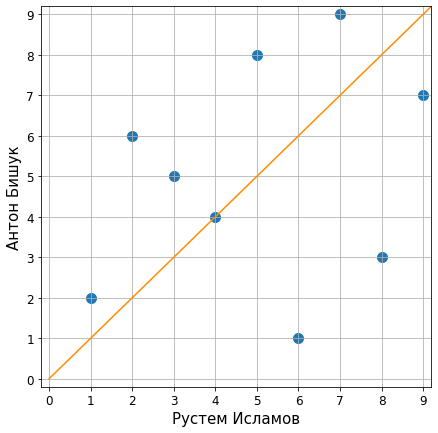

In [184]:
plt.figure(figsize=[7,7])
plt.xlim([-0.2,9.2])
plt.ylim([-0.2,9.2])
plt.scatter(my_rating, andrey_rating,s=100)
plt.plot([0,10],[0,10], color='darkorange')
plt.xlabel(r'Рустем Исламов', fontsize=15)
plt.ylabel(r'Антон Бишук', fontsize=15)
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.yticks([0,1,2,3,4,5,6,7,8,9])
plt.grid()
plt.savefig('rustem_vs_anton.pdf')

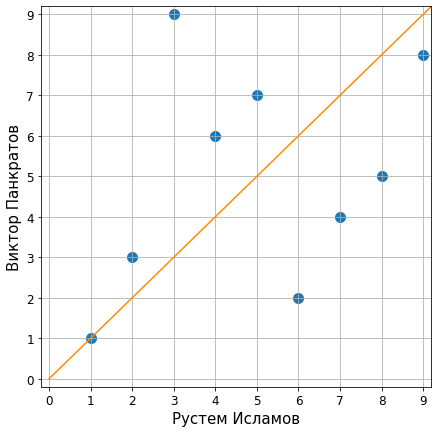

In [185]:
plt.figure(figsize=[7,7])
plt.xlim([-0.2,9.2])
plt.ylim([-0.2,9.2])
plt.scatter(my_rating, viktor_rating,s=100)
plt.plot([0,10],[0,10], color='darkorange')
plt.xlabel(r'Рустем Исламов', fontsize=15)
plt.ylabel(r'Виктор Панкратов', fontsize=15)
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.yticks([0,1,2,3,4,5,6,7,8,9])
plt.grid()
plt.savefig('rustem_vs_victor.pdf')

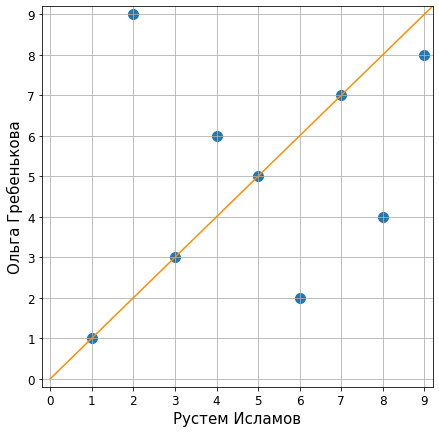

In [187]:
plt.figure(figsize=[7,7])
plt.xlim([-0.2,9.2])
plt.ylim([-0.2,9.2])
plt.scatter(my_rating, olya_rating,s=100)
plt.plot([0,10],[0,10], color='darkorange')
plt.xlabel(r'Рустем Исламов', fontsize=15)
plt.ylabel(r'Ольга Гребенькова', fontsize=15)
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.yticks([0,1,2,3,4,5,6,7,8,9])
plt.grid()
plt.savefig('rustem_vs_olya.pdf')

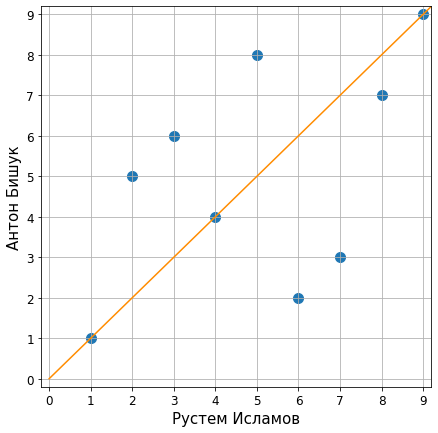

In [50]:
plt.figure(figsize=[7,7])
plt.xlim([-0.2,9.2])
plt.ylim([-0.2,9.2])
plt.scatter(my_rating, anton_rating,s=100)
plt.plot([0,10],[0,10], color='darkorange')
plt.xlabel(r'Рустем Исламов', fontsize=15)
plt.ylabel(r'Антон Бишук', fontsize=15)
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.yticks([0,1,2,3,4,5,6,7,8,9])
plt.grid()
plt.savefig('rustem_vs_anton.pdf')